# MOwNiT
## Laboratorium 1
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames" )
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji: https://juliadata.github.io/DataFrames.jl/stable/index.html





In [40]:
# za pierwszym razem, jeśli uruchamiamy lokalnie to instalujemy 
using Pkg
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `C:\Users\mateu\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\mateu\.julia\environments\v1.11\Manifest.toml`


In [41]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
 Row │ MojaKolumna  x2        Col3  
     │ Int64        Float64   Bool  
─────┼──────────────────────────────
   1 │           1   4.0       true
   2 │           2   3.14159  false
   3 │           3   1.41421   true
   4 │           4  42.0      false

In [42]:
# ! - nie tworzy kopii, : - tworzy kopię
typeof(df1[!,2])

Vector{Float64} (alias for Array{Float64, 1})

In [43]:
typeof(df1[:,2])

Vector{Float64} (alias for Array{Float64, 1})

In [44]:
typeof(df1.Col3)

Vector{Bool} (alias for Array{Bool, 1})

In [45]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true
7,7,3.14159,true
8,8,1.41421,false
9,9,3.0,true


In [46]:
# ilosc wierszy
size(df2, 1) 

10

In [47]:
#ilosc kolumn
size(df2, 2) 

3

In [48]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [49]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [50]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
 Row │ MojaKolumna  Col2     Col3  
     │ Int64        Float64  Bool  
─────┼─────────────────────────────
   3 │           3  1.41421  false

In [51]:
# drugi i trzeci wiersz
df2[2:3, :]

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,true
2,3,1.41421,false


In [52]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Vector{Float64}:
 3.141592653589793
 1.4142135623730951

In [53]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

Row,Col2,Col3
,Float64,Bool
1,3.14159,true
2,1.41421,false


In [54]:
# pierwsze sześć wierszy
DataFrames.first(df2,6)

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true


In [55]:
# ostatnie sześć wierszy
DataFrames.last(df2,6)

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,false
2,6,2.0,true
3,7,3.14159,true
4,8,1.41421,false
5,9,3.0,true
6,10,4.0,false


In [56]:
# nazwy kolumn
names(df2)

3-element Vector{String}:
 "MojaKolumna"
 "Col2"
 "Col3"

In [57]:
# typy kolumn
eltype.(eachcol(df2))

3-element Vector{DataType}:
 Int64
 Float64
 Bool

In [58]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,MojaKolumna,5.5,1,5.5,10,0,Int64
2,Col2,2.71116,1.41421,3.0,4.0,0,Float64
3,Col3,0.6,false,1.0,true,0,Bool


In [59]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [60]:
var(df2.Col2)

0.9150284373648316

In [61]:
using Pkg
Pkg.add("CSV")
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";",DataFrame)

   Resolving package versions...
  No Changes to `C:\Users\mateu\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\mateu\.julia\environments\v1.11\Manifest.toml`


Row,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [62]:
describe(mydata)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,fixed acidity,8.31964,4.6,7.9,15.9,0,Float64
2,volatile acidity,0.527821,0.12,0.52,1.58,0,Float64
3,citric acid,0.270976,0.0,0.26,1.0,0,Float64
4,residual sugar,2.53881,0.9,2.2,15.5,0,Float64
5,chlorides,0.0874665,0.012,0.079,0.611,0,Float64
6,free sulfur dioxide,15.8749,1.0,14.0,72.0,0,Float64
7,total sulfur dioxide,46.4678,6.0,38.0,289.0,0,Float64
8,density,0.996747,0.99007,0.99675,1.00369,0,Float64
9,pH,3.31111,2.74,3.31,4.01,0,Float64


In [63]:
typeof(mydata)

DataFrame

In [64]:
size(mydata)

(1599, 12)

In [65]:
# Dzielenie DataFrame na podgrupy i działania na nich

# Split -Apply - Combine

#https://dataframes.juliadata.org/stable/man/split_apply_combine/

# rozdzielanie na podgrupy po jakości wina (quality)
# Split

wine_grouped=groupby(mydata, :quality)

Row,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3
2,10.4,0.61,0.49,2.1,0.2,5.0,16.0,0.9994,3.16,0.63,8.4,3
3,7.4,1.185,0.0,4.25,0.097,5.0,14.0,0.9966,3.63,0.54,10.7,3
4,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
5,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
6,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3
7,6.8,0.815,0.0,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
8,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
9,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.4,0.52,10.2,3


In [66]:

# podsumowanie ile jest win w każdej grupie 
combine(wine_grouped, nrow)

Row,quality,nrow
,Int64,Int64
1,3,10
2,4,53
3,5,681
4,6,638
5,7,199
6,8,18


In [67]:
combine(wine_grouped, "fixed acidity" => mean)

Row,quality,fixed acidity_mean
,Int64,Float64
1,3,8.36
2,4,7.77925
3,5,8.16725
4,6,8.34718
5,7,8.87236
6,8,8.56667


In [68]:
# zliczenie liczby win o danej jakości i zawartości alkoholu, posortowane
wine_grouped2=sort(combine(groupby(mydata, [:quality,:alcohol]),nrow=> :liczba), [:quality,:alcohol])

Row,quality,alcohol,liczba
,Int64,Float64,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [69]:
# zapis do pliku
CSV.write("dataframe1.csv", wine_grouped2)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames




In [70]:
using DataFrames
df = DataFrame(a = 1:10, b = map(x->2x,(1:10)), c = map(x->log(x),(1:10)), d=rand(10), e=map(x->x%2,(1:10)))

Row,a,b,c,d,e
,Int64,Int64,Float64,Float64,Int64
1,1,2,0.0,0.360354,1
2,2,4,0.693147,0.864027,0
3,3,6,1.09861,0.152508,1
4,4,8,1.38629,0.572909,0
5,5,10,1.60944,0.425937,1
6,6,12,1.79176,0.0990161,0
7,7,14,1.94591,0.840858,1
8,8,16,2.07944,0.387202,0
9,9,18,2.19722,0.213538,1


   Resolving package versions...
  No Changes to `C:\Users\mateu\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\mateu\.julia\environments\v1.11\Manifest.toml`


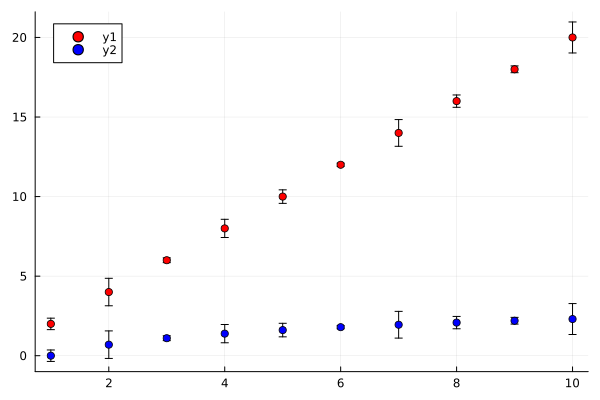

In [71]:
# Mozna odwolywac sie bezposrednio do kolumn w poniższy sposób (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})
Pkg.add("Plots")
using Plots
scatter(df.a, [df.b, df.c], colour = [:red :blue], yerr=df.d)


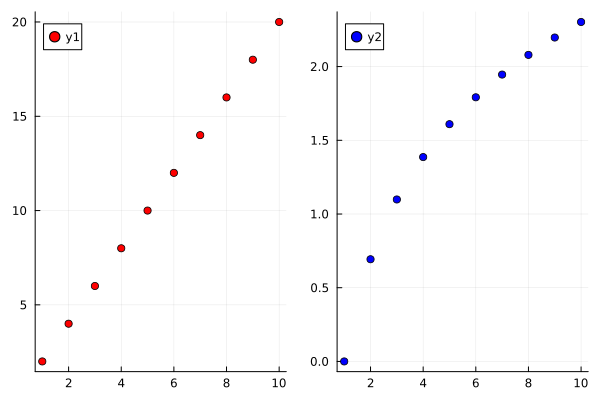

In [72]:
# użycie opcji layout
scatter(df.a, [df.b, df.c],  colour = [:red :blue ], layout=2)

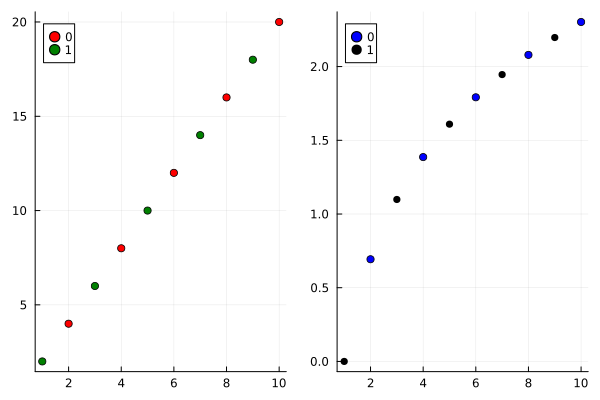

In [73]:
# użycie opcji layout i grup
scatter(df.a, [df.b, df.c], group=df.e,  colour = [:red :blue :green :black], layout=2)

Uwaga: Ze względu na specyfikę języka Julia pomiar czasu wykonania należy brać pod uwagę dopiero od drugiego wywołania danej funkcji
(za pierwszym razem mierzymy również czas kompilacji)

Makro @time - zwraca wartość funkcji i wypisuje czas jej trwania.
Makro @elapsed zwraca czas trwania (może być wygodniejsze w użyciu). 
Warto też oglądnąć działanie makr @timev, @timed, i @allocated

https://docs.julialang.org/en/v1/base/base/#Base.@time

Rand(10) - wylosuj 10-elementową tablicę Float64 z przedziału [0,1)

https://docs.julialang.org/en/v1/stdlib/Random/#Base.rand

### Zadanie 
- Założenie: macierz A - kwadratowa rozmiar n x n; wektory x, y rozmiar n
- Napisać programy w języku Julia do obliczania: <b>uogólnionego</b> iloczynu skalarnego dot(x, <b>A</b>, y) wektorów z użyciem <a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot-Tuple{Any,%20Any,%20Any}">LinearAlgebra.dot</a> oraz mnożenia macierzy kwadratowej przez wektor (czyli obliczania A*x) z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów n. Uwaga: rozmiary dobrać tak, żeby nie zużyć zbyt wiele pamięci, a jednocześnie uzyskać niezerowe wyniki czasowe (wielkości będą zależeć od mocy sprzętu - można próbować testować w okolicach n=1000). Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [1]:
import Pkg
Pkg.add("BenchmarkTools")

    Updating registry at `C:\Users\mateu\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\mateu\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\mateu\.julia\environments\v1.11\Manifest.toml`


In [17]:
using LinearAlgebra, DataFrames, CSV, Random, Statistics, BenchmarkTools
function generalized_dot(x, A, y)
    return dot(x, A * y)
end

function matrix_vector_mult(A, x)
    return A * x
end

function measure_times(n, num=10)
    results = DataFrame(n = Int[], method = String[], time = Float64[])

    for i in n
        A = rand(i, i)
        x = rand(i)
        y = rand(i)

        generalized_dot(x, A, y)
        matrix_vector_mult(A, x)
        
        for _ in 1:num
            time = @elapsed generalized_dot(x, A, y)
            push!(results, (i, "generalized_dot", time))
        end
        
        for _ in 1:num
            time = @elapsed matrix_vector_mult(A, x)
            push!(results, (i, "matrix_vector_mult", time))
        end
    end

    return results
end

n_values = collect(500:1500:30000)
results = measure_times(n_values)

CSV.write("results.csv", results)





"results.csv"

In [18]:
input = "results.csv"
mydata=CSV.read(input, delim=",",DataFrame)

Row,n,method,time
,Int64,String31,Float64
1,500,generalized_dot,3.16e-5
2,500,generalized_dot,3.06e-5
3,500,generalized_dot,3.05e-5
4,500,generalized_dot,3.07e-5
5,500,generalized_dot,3.1e-5
6,500,generalized_dot,3.06e-5
7,500,generalized_dot,3.04e-5
8,500,generalized_dot,3.04e-5
9,500,generalized_dot,3.04e-5


In [19]:
using Statistics

generalized_dot_data = mydata[mydata.method .== "generalized_dot", :]
generalized_avg = mean(generalized_dot_data.time)
generalized_std = std(generalized_dot_data.time)

println("Generalized Dot - Average time: ", generalized_avg)
println("Generalized Dot - Standard deviation: ", generalized_std)

mvm_data = mydata[mydata.method .== "matrix_vector_mult", :]
mvm_avg = mean(mvm_data.time)
mvm_std = std(mvm_data.time)

println("Matrix Vector Mult - Average time: ", mvm_avg)
println("Matrix Vector Mult - Standard deviation: ", mvm_std)


Generalized Dot - Average time: 0.0638272865
Generalized Dot - Standard deviation: 0.05747009083295946
Matrix Vector Mult - Average time: 0.06374712699999999
Matrix Vector Mult - Standard deviation: 0.057115104530310656


In [20]:
mvm_results = combine(groupby(mvm_data, :n), :time => mean => :avg_time, :time => std => :std_time)
generalized_results = combine(groupby(generalized_dot_data, :n), :time => mean => :avg_time, :time => std => :std_time)

println("Matrix Vector Mult:")
println(mvm_results)

println("Generalized Dot:")
println(generalized_results)

Matrix Vector Mult:
20×3 DataFrame
 Row │ n      avg_time    std_time    
     │ Int64  Float64     Float64     
─────┼────────────────────────────────
   1 │   500  3.025e-5    1.2693e-7
   2 │  2000  0.00053237  1.69929e-5
   3 │  3500  0.00272777  0.000186958
   4 │  5000  0.00585331  0.000311419
   5 │  6500  0.00941387  0.000161569
   6 │  8000  0.0141134   0.000807787
   7 │  9500  0.0194622   0.000490894
   8 │ 11000  0.0261805   0.000421578
   9 │ 12500  0.0348173   0.00112879
  10 │ 14000  0.0448338   0.00048638
  11 │ 15500  0.0512376   0.000464168
  12 │ 17000  0.0635623   0.000866393
  13 │ 18500  0.0749979   0.000378098
  14 │ 20000  0.087706    0.000819921
  15 │ 21500  0.101189    0.000727831
  16 │ 23000  0.11905     0.00322084
  17 │ 24500  0.130886    0.00120014
  18 │ 26000  0.146012    0.001912
  19 │ 27500  0.16393     0.00277438
  20 │ 29000  0.178408    0.0012
Generalized Dot:
20×3 DataFrame
 Row │ n      avg_time    std_time    
     │ Int64  Float64     Float64

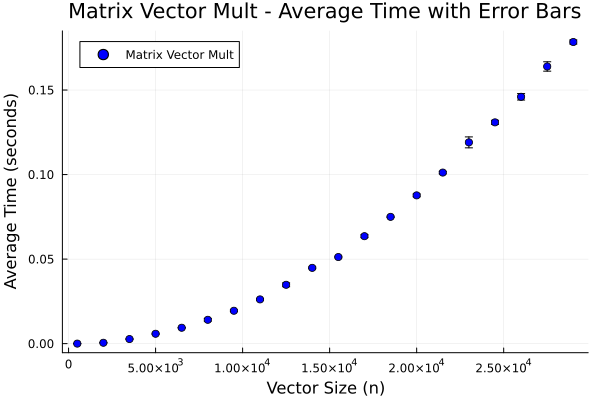

In [21]:
using Plots
scatter(mvm_results.n, mvm_results.avg_time, yerror=mvm_results.std_time, color=:blue, label="Matrix Vector Mult", xlabel="Vector Size (n)", ylabel="Average Time (seconds)", title="Matrix Vector Mult - Average Time with Error Bars", marker=:circle)



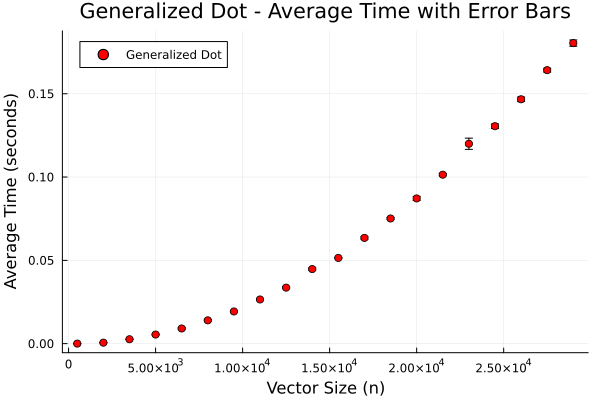

In [23]:
scatter(generalized_results.n, generalized_results.avg_time, yerror=generalized_results.std_time, color=:red, label="Generalized Dot", xlabel="Vector Size (n)", ylabel="Average Time (seconds)", title="Generalized Dot - Average Time with Error Bars", marker=:circle)

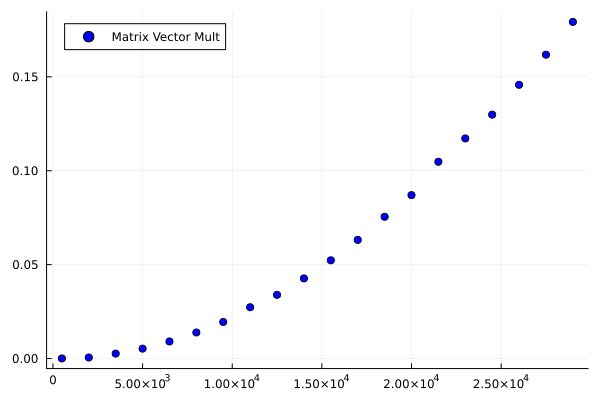

In [11]:
scatter(mvm_data.n, mvm_data.time, colour = :blue, label = "Matrix Vector Mult")


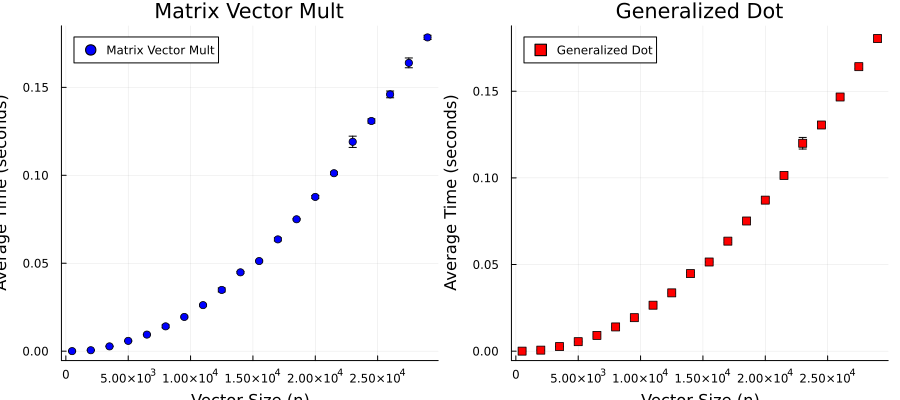

In [31]:
plot(
    scatter(mvm_results.n, mvm_results.avg_time, yerror=mvm_results.std_time, color=:blue, label="Matrix Vector Mult", xlabel="Vector Size (n)", ylabel="Average Time (seconds)", title="Matrix Vector Mult", marker=:circle),
    scatter(generalized_results.n, generalized_results.avg_time, yerror=generalized_results.std_time, color=:red, label="Generalized Dot", xlabel="Vector Size (n)", ylabel="Average Time (seconds)", title="Generalized Dot", marker=:square),
    layout = (1,2),
    size = (900,400)
)